# Predict the Health Insurance Cost Project

The United States has one of the highest cost of healthcare in the world. Despite higher healthcare spending, international common heath metrics evaluation doesn’t provide better health outcomes, due to unnecessary services and waste.

The goal of this project is to know which factor highly affects the healthcare cost and to accurately predict healthcare insurance cost in the US. We will use Linear Regression to predict the health insurance cost. Hopefully, the prediction of this machine learning model might bring benefits to health insurance beneficiaries, so they can allocate their healthcare budget better.

The data used for this project is a secondary data from Miri Choi. The writer decided to use a secondary data because she lived in Indonesia and is not possible to gather data to the US during the Covid-19 pandemic.

### Columns

- **age:** age of primary beneficiary

- **sex:** insurance contractor gender, female, male

- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children:** Number of children covered by health insurance / Number of dependents

- **smoker:** Smoking

- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- **charges:** Individual medical costs billed by health insurance

# Preprocessing
## Import all necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

# read dataset

In [3]:
df=pd.read_csv("insurance.csv")

# Explore the DataFrame using info(), head()

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### According to the picture, we can classify the data scales as below:

- nominal scale: gender (sex), smoker, region
- ordinal: -
- interval: BMI
- ratio: children, age, charges



# Since we have some string-typed data, use an Encoder to convert string values to numeric values:

In [6]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Data Cleaning
## Drop all duplicated rows:

In [8]:
df.duplicated().sum()

1

In [9]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1338, 7)
(1337, 7)


# Use df.describe() to display descriptive statistics about the data.

In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


From the table above, we can observe that the mean and the median of the columns: age, BMI, and children, doesn’t have much difference. Despite of this ideal condition, there are some points to be concerned about. In the BMI column there is pretty much difference between the 3rd quartile (34.7) and the maximum value (53.13). In addition to this, the averages of the charges column have a significant difference compared to its maximum value (mean: 13,279.12, median: 9,386.16, max. value: 63,770.43). Hence, we can conclude that there might be outliers in BMI and charges columns.

# To prove our suspicions, let’s use boxplot to identify outliers in these columns:

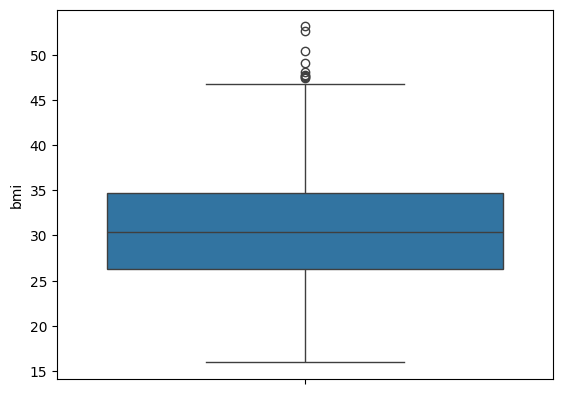

In [11]:
sns.boxplot(data=df["bmi"])
plt.show()

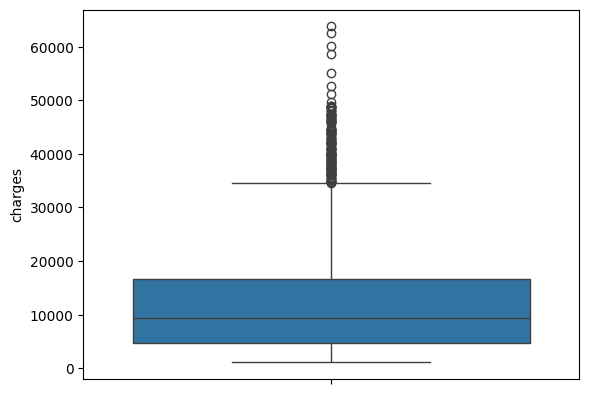

In [12]:
sns.boxplot(data=df["charges"])
plt.show()

 The black dots above the plot show outliers of the BMI table

# For now don't Drop rows in the outlier list we will Discusses about how to deal with them later

# Feature selection
Since we have 6 columns of independent variables, we would like to know which variable has greater impact to the dependent variable. We can use a Seaborn heatmap of correlation to look through the correlation between each variable.

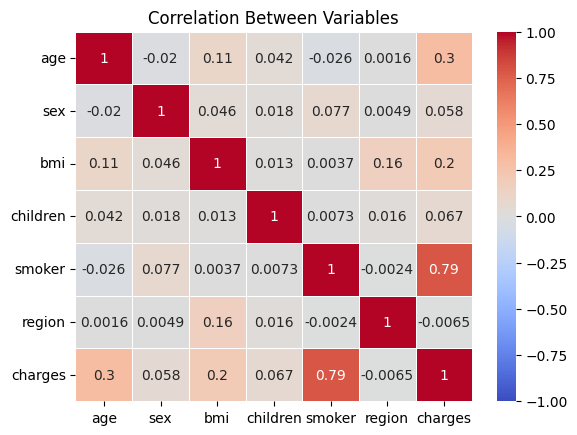

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1,vmax=1)
# Show the plot
plt.title('Correlation Between Variables')
plt.show()

From the picture above, the columns having correlation values in between -0.1 and 0.1 will be eliminated, since they are barely correlated to the charges column.

# creat new data frame with important columns

In [14]:
data=df
df.drop(columns=["sex","children","region"],inplace=True)

# Check the data distribution using pair plot

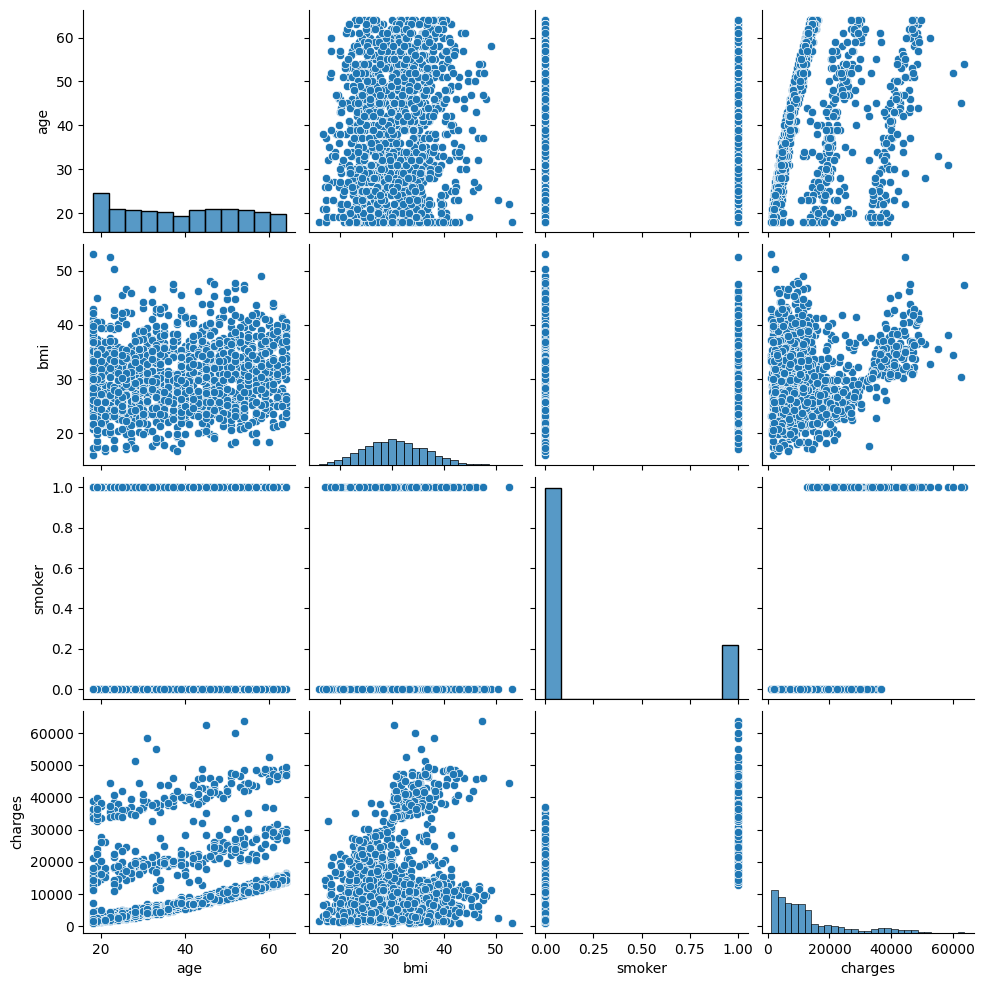

In [15]:
sns.pairplot(data=df)
plt.show()

As we can see in the pair plot, the smoker column and the charges column tend to congregate on one side. This indicates that our data is not normally distributed (skewed). Therefore, we have to handle the skewness of these columns. In this project, we use logarithmic transformation to handle the skewed columns. Logarithmic transformation is used because a number will never be negative when log-transformed ( charges column can never be negative).

# creat new data frame with normalized age and charges columns

In [16]:
df.skew()

age        0.054781
bmi        0.283914
smoker     1.463601
charges    1.515391
dtype: float64

In [17]:
columns_to_transform = ['age', 'bmi', 'smoker', 'charges']
df[columns_to_transform] = np.log(df[columns_to_transform]+1)

Before building the Linear Regression Model, we will examine the correlation between variables once more to ensure that the independent variables has enough correlation to the dependent variable after transformation.

# check the corr

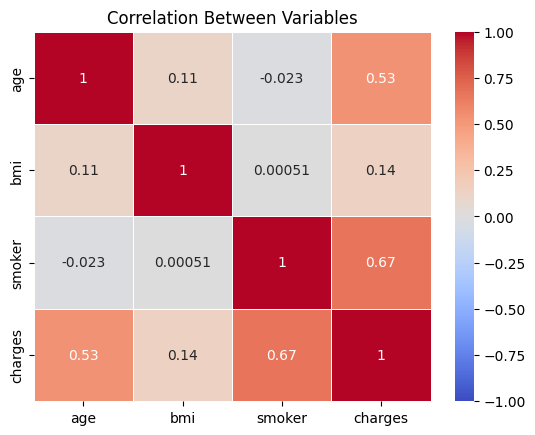

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1,vmax=1)
# Show the plot
plt.title('Correlation Between Variables')
plt.show()

# Building the Linear Regression Model
In building the model, we need to split the dataset into dependent variable (y) and the independent variables (X).

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
X=df.drop(columns=["charges"])
y=df["charges"]
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
model= LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [34]:
model.score(train_X,train_y)

0.7416746390882777

In [35]:
model.score(test_X,test_y)

0.772217203364272

In [36]:
predictions = model.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mse

0.20036388577516728

We will combine the k-Fold Cross Validation method in making our Linear Regression model, to improve the generalizability of our model, as well as to avoid overfitting in our predictions.
# create your model with the number of fold (n_splits) to 10.



In [39]:
from sklearn.model_selection import cross_val_score
model_cv= LinearRegression()
mse_scores = -cross_val_score(model_cv, train_X, train_y, cv=10, scoring='neg_mean_squared_error')
mse_scores

array([0.33285034, 0.14210109, 0.21915336, 0.19750668, 0.23185277,
       0.1886384 , 0.22306326, 0.19174588, 0.27036765, 0.15763777])

In [40]:
mse_scores.mean()

0.21549172093063337